수정일: 2025.09.02

#HW1: Housing Price Prediction

이번 과제에서는 linear regression을 이용해 집값을 예측하려고 한다. 아래 나오는 내용들을 잘 읽어보고 지시에 따라 코드를 완성해 보자.

우선 필요한 모듈을 불러오고, 필요한 셋팅을 한다.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import urllib # 데이터셋을 다운로드 받기 위해 필요

## 데이터
아래 코드를 실행시키면, 과제에 필요한 데이터를 다운로드한다. 데이터 파일의 이름은 housing_prices.txt이다.

In [2]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1IhCTHicT0lVt_SAYwaLNPokyC-TOMJGL' -O housing_prices.txt

--2025-09-02 07:04:43--  https://docs.google.com/uc?export=download&id=1IhCTHicT0lVt_SAYwaLNPokyC-TOMJGL
Resolving docs.google.com (docs.google.com)... 142.251.107.100, 142.251.107.138, 142.251.107.101, ...
Connecting to docs.google.com (docs.google.com)|142.251.107.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1IhCTHicT0lVt_SAYwaLNPokyC-TOMJGL&export=download [following]
--2025-09-02 07:04:43--  https://drive.usercontent.google.com/download?id=1IhCTHicT0lVt_SAYwaLNPokyC-TOMJGL&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 172.217.203.132, 2607:f8b0:400c:c07::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|172.217.203.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 657 [application/octet-stream]
Saving to: ‘housing_prices.txt’

housing_prices.txt  100%[===================>]     657  --.-KB/s    in

다운로드 받은 파일을 읽고, 잘 읽었는지 확인하기 위해 일부 데이터를 출력한다.

housing_prices.txt 파일 안에는 데이터가 텍스트 파일로 저장되어 있으며, 각각의 값은 쉼표(comma)로 구분된다. 이러한 파일은 NumPy의 [loadtxt](https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html) 함수로 불러올 수 있다.

데이터의 첫 번째 열(column)은 집의 크기(ft<sup>2</sup>), 두 번째 열은 방의 개수, 세 번째 열은 집의 가격($)을 나타낸다.

In [3]:
dataset = np.loadtxt("housing_prices.txt", dtype=np.float64, delimiter=",")
dataset[:5, ::]

array([[2.104e+03, 3.000e+00, 3.999e+05],
       [1.600e+03, 3.000e+00, 3.299e+05],
       [2.400e+03, 3.000e+00, 3.690e+05],
       [1.416e+03, 2.000e+00, 2.320e+05],
       [3.000e+03, 4.000e+00, 5.399e+05]])

불러온 데이터를 입력 변수(input variable)와 출력 변수(output variable)로 분리한다. 이는 NumPy의 [Slicing](https://numpy.org/doc/stable/user/basics.indexing.html#slicing-and-striding)을 이용하면 된다.

In [4]:
X = dataset[:, :2] # 첫 번째와 두 번째 열. 크기가 (데이터 개수, 2)
Y = dataset[:, -1] # 마지막 열. 크기가 (데이터 개수, 1)
m, n = X.shape # 데이터 개수와 feature의 수

분리한 데이터의 일부를 출력해본다.

In [5]:
print("X의 크기:", X.shape)
print("Y의 크기:", Y.shape)
print("데이터 개수:", m)
print("Feature 수:", n)

print("X:")
print(X[:5,:])

print("Y:")
print(Y[:5])

X의 크기: (47, 2)
Y의 크기: (47,)
데이터 개수: 47
Feature 수: 2
X:
[[2.104e+03 3.000e+00]
 [1.600e+03 3.000e+00]
 [2.400e+03 3.000e+00]
 [1.416e+03 2.000e+00]
 [3.000e+03 4.000e+00]]
Y:
[399900. 329900. 369000. 232000. 539900.]


불러온 데이터를 그래프로 출력한다.

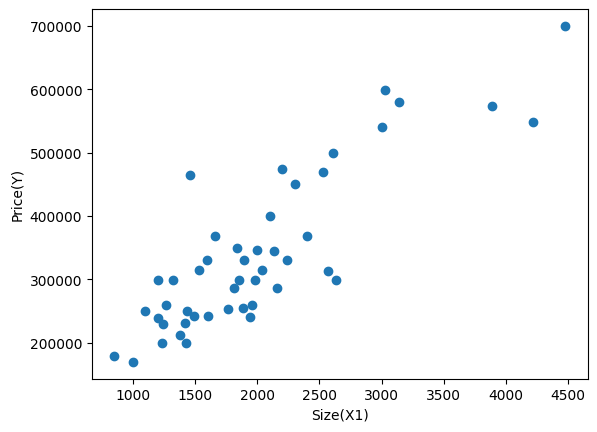

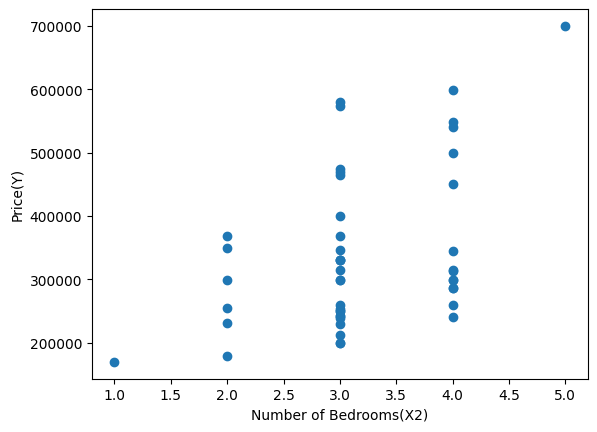

In [6]:
fig, axes = plt.subplots()

axes.scatter(X[:, 0], Y)
axes.set_xlabel("Size(X1)")
axes.set_ylabel("Price(Y)")
plt.show()

fig, axes = plt.subplots()

axes.scatter(X[:, -1:], Y)
axes.set_xlabel("Number of Bedrooms(X2)")
axes.set_ylabel("Price(Y)")
plt.show()

## Feature Scaling
데이터를 보면 x<sub>1</sub>과 x<sub>2</sub>의 데이터 범위가 크게 차이가 난다. 따라서 feature scaling을 통해 값의 범위를 조정해 줄 것이다. 여기서는 standardization을 이용해 feature scaling을 한다. Standardization에서는 각 feature 또는 열에 대해 평균 $\mu$과 표준편차 $\sigma$를 계산하고, 다음 식을 이용해 값을 변경한다.

$x_i=\cfrac{x_i-\mu_i}{\sigma_i}$

평균은 NumPy의 [mean](https://numpy.org/doc/stable/reference/generated/numpy.mean.html) 함수를 이용하면 되고, 표준편차는 [std](https://numpy.org/doc/stable/reference/generated/numpy.std.html) 함수를 이용하면 된다. 단, axis 값을 적절하게 설정해야 한다.

x<sub>1</sub>과 x<sub>2</sub>의 값이 변경되었으므로, 원래 값과의 관계를 알기 위해 평균과 표준편차를 저장해 놓아야 한다.

**지시: feature_scaling을 해주는 아래 함수를 완성한다.**

In [7]:
def feature_scaling(X):
  '''
  입력 변수 X를 feature scaling한 후 값을 반환하는 함수

  매개변수:
    X: 입력 변수, NumPy 2차원 배열

  반환:
    feature scaling한 X, NumPy 2차원 배열
    X의 각 열에 대한 평균값, 스칼라 1차원 배열
    X의 각 열에 대한 표준편차, 스칼라 1차원 배열
  '''

  ## X의 각 열에 대한 평균을 계산하여 변수 mean에 저장할 수 있도록,
  ## 아래 코드를 적절히 수정하시오.
  ## X의 전체 평균이 아닌, 각 열마다 평균을 구해야한다.
  ## NumPy의 broadcasting을 이용하면 한 줄로 계산할 수 있다.
  #### 코드 시작 ####
  mean = np.mean(X, axis=0)
  #### 코드 종료 ####

  ## X의 각 열에 대한 표준편차를 계산하여 변수 std에 저장할 수 있도록,
  ## 아래 코드를 적절히 수정하시오.
  ## X의 전체 평균이 아닌, 각 열마다 평균을 구해야한다.
  ## NumPy의 broadcasting을 이용하면 한 줄로 계산할 수 있다.
  #### 코드 시작 ####
  std = np.std(X, axis=0)
  #### 코드 종료 ####

  ## X의 값에 대해 mean normalization을 수행한다.
  ## NumPy의 broadcasting을 이용하면 한 줄로 계산할 수 있다.
  ## 아래 코드를 적절히 수정하시오.
  #### 코드 시작 ####
  X_scaling = (X - mean) / std
  #### 코드 종료 ####

  return X_scaling, mean, std

Feature scaling을 한 후의 x<sub>1</sub>과 x<sub>2</sub>는 평균이 0, 표준편차가 1에 가까워야 한다.

In [8]:
# 평균 mean과 표준편차 std를 기억해 놓는다.
# 이 뒤부터는 X 대신 X_scaling을 이용한다.
X_scaling, mean, std = feature_scaling(X)

# 아래는 테스트 코드이다.
assert abs(mean[0] - 2000.68085106) < 0.0001
assert abs(mean[1] - 3.17021277) < 0.0001
assert abs(std[0] - 7.86202619e+02) < 0.0001
assert abs(std[1] - 7.52842809e-01) < 0.0001

print("성공!")

성공!


## x<sub>0</sub> 열 추가
여러 개의 feature를 가지는 linear regression에서는 수식을 단순하게 만들기 위해 x<sub>0</sub>=1의 값을 가지는 열을 추가한다. 이는 model 함수를 행렬로 단순하게 표현할 수 있게 한다.

$f(\theta)=\begin{bmatrix}\theta_0 & \theta_1 & ... & \theta_n\end{bmatrix}
\begin{bmatrix}x_0=1 \\ x_1 \\ ... \\ x_n\end{bmatrix}=\theta^T x$

In [9]:
X_bias = np.ones((m, n+1))
X_bias[:, 1:] = X_scaling

print(X_bias[:5,:])

[[ 1.          0.13141542 -0.22609337]
 [ 1.         -0.5096407  -0.22609337]
 [ 1.          0.5079087  -0.22609337]
 [ 1.         -0.74367706 -1.5543919 ]
 [ 1.          1.27107075  1.10220517]]


## Model 함수
집값을 예측하기 위한 model 함수를 정의한다. Model 함수는 다음과 같은 형태를 갖는다.

$f(\theta)=\begin{bmatrix}\theta_0 & \theta_1 & ... & \theta_n\end{bmatrix}
\begin{bmatrix}x_0=1 \\ x_1 \\ ... \\ x_n\end{bmatrix}=\theta^T x$

이는 $\theta$와 x의 행렬곱 또는 내적을 이용해 쉽게 계산할 수 있다.

행렬곱 또는 내적은 NumPy의 [dot](https://numpy.org/doc/stable/reference/generated/numpy.dot.html) 함수를 이용하면 된다.

**지시: Model 함수를 계산하는 아래 함수를 완성한다.**

In [10]:
def compute_model(X_bias, theta):
  '''
  입력 변수 X_bias와 theta에 대해 model 함수의 값을 계산하여 반환하는 함수

  매개변수:
    X_bias: x0가 추가된 입력 변수, NumPy 2차원 배열
    theta: parameter 값, NumPy 1차원 배열

  반환:
    Model 함수의 값, NumPy 1차원 배열
  '''

  ## X_bias와 theta를 이용하여 model 함수의 값을 계산한다.
  ## 이를 위해 아래 코드를 적절히 수정하시오.
  #### 코드 시작 ####
  f = np.dot(X_bias, theta)
  #### 코드 종료 ####

  return f

아래 코드는 테스트 코드이다. "성공!"이라고 출력되어야 한다.

In [11]:
# 함수 compute_model()의 테스트 코드

f_temp1 = compute_model(X_bias, [0, 0, 0])
assert f_temp1.size == 47
assert f_temp1.shape == (47,)
assert np.all(f_temp1 == 0)

f_temp2 = compute_model(X_bias, [0.1, 2, 0.5])
assert f_temp2.size == 47
assert f_temp2.shape == (47,)
assert abs(f_temp2[0] - 0.24978416) < 0.0001
assert abs(f_temp2[1] + 1.03232808) < 0.0001

print("성공!")

성공!


## Loss 함수
Model 함수의 parameter를 찾는데 사용할 loss 함수를 계산한다. Gradient descent 알고리즘에서는 loss 함수를 직접 이용하지는 않는다. 그러나 수렴성을 확인하기 위한 목적으로 loss 값을 저장한다.

Loss 함수는 다음과 같이 계산할 수 있다.

$L(\theta)=\cfrac{1}{2m}\sum_{i=1}^{m}(f_{\theta}(x^{(i)})-y^{(i)})^2$

합계는 NumPy의 [sum](https://numpy.org/doc/stable/reference/generated/numpy.sum.html) 함수를 이용하면 쉽게 계산할 수 있다.

**지시: Loss 함수를 계산하는 아래 함수를 완성한다.**

In [12]:
def compute_loss(X_bias, Y, theta):
  '''
  theta에 대해 loss 함수의 값을 계산하여 반환하는 함수

  매개변수:
    X_bias: x0가 추가된 입력 변수, NumPy 2차원 배열
    Y: 출력 변수, NumPy 1차원 배열
    theta: parameter 값, NumPy 1차원 배열

  반환:
    theta에서의 loss 값, 스칼라
  '''

  m = Y.size # 데이터의 갯수

  ## X_bias와 theta를 이용하여 model 함수의 값을 계산한다.
  ## 이 때, 앞에서 구현한 compute_model() 함수를 이용한다.
  ## 이를 위해 아래 코드를 적절히 수정하시오.
  #### 코드 시작 ####
  f = compute_model(X_bias, theta)
  #### 코드 종료 ####

  ## Y와 f를 이용하여 loss 값을 계산한다.
  ## 이를 위해 아래 코드를 적절히 수정하시오.
  #### 코드 시작 ####
  L = np.sum((f - Y)**2) / (2*m)
  #### 코드 종료 ####

  return L

아래 코드는 테스트 코드이다. "성공!"이라고 출력되어야 한다.

In [13]:
# 함수 compute_loss()의 테스트 코드

L_temp1 = compute_loss(X_bias, Y, [0, 0, 0])
assert abs(L_temp1 - 65591548106.45744) < 0.0001

L_temp2 = compute_loss(X_bias, Y, [3, 2, 5])
assert abs(L_temp2 - 65590041820.70264) < 0.0001

print("성공!")

성공!


## Gradient 함수
Gradient descent 방법을 이용하기 위해서는 loss 함수의 gradient를 계산해야 한다.

Gradient는 다음과 같이 계산할 수 있다.

$\frac{\partial}{\partial \theta_j}L(\theta)=\cfrac{1}{m}\sum_{i=1}^{m}(f_{\theta}(x^{(i)})-y^{(i)}) x_{j}^{(i)}$

위의 gradient 계산 식은 NumPy의 [dot](https://numpy.org/doc/stable/reference/generated/numpy.dot.html) 함수를 이용하면 쉽게 계산할 수 있다.

**지시: Loss의 gradient를 계산하는 아래 함수를 완성한다.**

In [15]:
def compute_gradient(X_bias, Y, theta):
  '''
  theta에 대해 loss의 gradient 값을 계산하여 반환하는 함수

  매개변수:
    X_bias: x0가 추가된 입력 변수, NumPy 2차원 배열
    Y: 출력 변수, NumPy 1차원 배열
    theta: parameter 값, NumPy 1차원 배열

  반환:
    theta에서의 loss의 gradient 값, NumPy 1차원 배열
  '''

  m, n = X.shape # 데이터 개수와 feature의 수

  ## X_bias와 theta를 이용하여 model 함수의 값을 계산한다.
  ## 이 때, 앞에서 구현한 compute_model() 함수를 이용한다.
  ## compute_loss() 함수에서도 동일한 값을 계산한 적이 있다.
  ## 이를 위해 아래 코드를 적절히 수정하시오.
  #### 코드 시작 ####
  f = compute_model(X_bias, theta)
  #### 코드 종료 ####

  ## h와 X_bias, Y를 이용해 gradient를 계산한다.
  ## gradient는 np.dot을 이용하면 쉽게 계산할 수 있다.
  ## 이를 위해 아래 코드를 적절히 수정하시오.
  #### 코드 시작 ####
  dL = np.dot((f - Y), X_bias) / m
  #### 코드 종료 ####

  return dL

아래 코드는 테스트 코드이다. "성공!"이라고 출력되어야 한다.

In [16]:
# 함수 compute_gradient()의 테스트 코드

dL_temp1 = compute_gradient(X_bias, Y, [0, 0, 0])
assert abs(dL_temp1[0] + 340412.65957447) < 0.0001
assert abs(dL_temp1[1] + 105764.13349282) < 0.0001
assert abs(dL_temp1[2] + 54708.82175587) < 0.0001

dL_temp2 = compute_gradient(X_bias, Y, [3, 2, 5])
assert abs(dL_temp2[0] + 340409.65957447) < 0.0001
assert abs(dL_temp2[1] + 105759.33365679) < 0.0001
assert abs(dL_temp2[2] + 54702.70182146) < 0.0001

print("성공!")

성공!


## Gradient Descent
수업 시간에 배운 내용을 바탕으로 gradient descent 알고리즘을 구현한다. Gradient descent 알고리즘의 핵심은 다음 식을 일정 횟수만큼 반복하여 계산하는 것이다.

$\theta^{(k+1)}=\theta^{(k)}-a\nabla L(\theta^{(k)})$

**지시: Gradient descent 알고리즘을 수행하는 아래 코드를 완성한다.**

In [17]:
# Hyperparameter를 설정한다.
# 사용자가 변경할 수 있다.
iterations = 1000 # 반복 회수
learning_rate = 0.1 # Learning rate
theta = np.zeros((n+1,)) # theta의 초기값은 0으로 설정

# 학습 상황을 저장하기 위한 변수
history = np.zeros((iterations + 1, n+1))
history[0, :n+1] = theta
history[0, -1] = compute_loss(X_bias, Y, theta)

for iter in range(iterations):
  ## gradient descent의 반복식을 나타내기 위해,
  ## 아래 코드를 적절히 수정하시오.
  #### 코드 시작 ####
  theta = theta - learning_rate * compute_gradient(X_bias, Y, theta)
  #### 코드 종료 ####

  # 수렴성을 확인하기 위해 매 iteration마다 loss를 계산한다.
  loss = compute_loss(X_bias, Y, theta)

  # 그래프 출력을 위해 중간 결과를 저장한다.
  history[iter + 1, :n+1] = theta
  history[iter + 1, -1] = loss

# 아래 결과가 [340412.65957447 109447.79646964  -6578.35485416]과 비슷하게 나와야 한다.
print("Theta found by gradient descent:", theta)

Theta found by gradient descent: [340412.65957447 109447.79646964  -6578.35485416]


아래 코드는 매 iteration 마다 loss가 변하는 과정을 그래프로 보여준다. Iteration이 진행됨에 따라서 loss가 감소해야 한다.

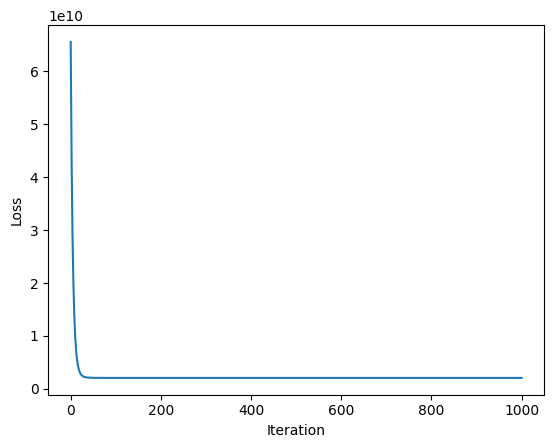

In [18]:
def plot_loss_history(history):
  x = np.arange(0, history.shape[0])
  y = history[:, -1]

  fig, axes = plt.subplots()
  axes.plot(x, y)
  axes.set_xlabel("Iteration")
  axes.set_ylabel("Loss")

plot_loss_history(history)
plt.show()

현재 찾은 $\theta$ 값을 이용해 집값을 예측해 볼 수 있다. 크기가 1,650(ft<sup>2</sup>)이고 방의 개수가 3개인 경우의 집값을 예측해보자. 단, x의 값으로 1,650과 3을 그대로 사용하면 안되고, 앞에서 구한 평균과 표준편차를 반영해 주어야 한다. 또한, x<sub>0</sub>=0인 값을 추가해 주어야 한다.

In [19]:
# 집값을 예측하기 위한 코드
def predict(mean, std, theta, x):
  x_scaling = (x - mean) / std
  x_bias = np.ones((x.size+1))
  x_bias[1:] = x_scaling

  f = compute_model(x_bias, theta)
  return f

x_predict = np.array([1650.0, 3])
y_predict = predict(mean, std, theta, x_predict)
print("크기 1650, 방의 개수 3인 집의 가격은 $", y_predict, "입니다")

크기 1650, 방의 개수 3인 집의 가격은 $ 293081.46433489595 입니다


이번 과제는 여기까지 입니다. 수고하셨습니다.